<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/main/hw01-1/hw01-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import time

from google.colab import drive
drive.mount('/content/drive')

# test whether torch is available
# if not, you could apply GPU by turn on it in Edit->Notebook Settings in the control bar
torch.cuda.is_available()

# download data from Fashion-Mnist website
train_data=datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor())


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten()  
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),   
            nn.ReLU(),           
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# dataloader
batch_size=64
train_loader=DataLoader(train_data,batch_size=batch_size)
test_loader=DataLoader(test_data,batch_size=batch_size)

! nvidia-smi
torch.cuda.is_available()

device = "cuda" if torch.cuda.is_available() else "cpu"

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.train()
    train_loss=0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)       
        loss = loss_fn(pred, y) 
        train_loss += loss.item()

        optimizer.zero_grad()  
        loss.backward()      
        optimizer.step()      
       
        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    return train_loss

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad(): 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

# training start
epochs=30

tt=time.time()
train_loss=[]
test_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}-------------------------------")
    loss = train(train_loader, model, loss_fn, optimizer)
    train_loss.append(loss)
    loss = test(test_loader, model, loss_fn)
    test_loss.append(loss)

elapse=time.time()-tt
print(elapse)



Wed Sep 28 14:52:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten()  
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),   
            nn.ReLU(),           
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# dataloader
batch_size=64
train_loader=DataLoader(train_data,batch_size=batch_size)
test_loader=DataLoader(test_data,batch_size=batch_size)

device = "cpu"

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.train()
    train_loss=0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)       
        loss = loss_fn(pred, y) 
        train_loss += loss.item()

        optimizer.zero_grad()  
        loss.backward()      
        optimizer.step()      
       
        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    return train_loss

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad(): 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

# training start
epochs=30

tt=time.time()
train_loss=[]
test_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}-------------------------------")
    loss = train(train_loader, model, loss_fn, optimizer)
    train_loss.append(loss)
    loss = test(test_loader, model, loss_fn)
    test_loss.append(loss)

elapse=time.time()-tt
print(elapse)

Epoch 1-------------------------------
Accuracy: 37.8%, Avg loss: 2.146533 

Epoch 2-------------------------------
Accuracy: 57.0%, Avg loss: 1.874059 

Epoch 3-------------------------------
Accuracy: 60.9%, Avg loss: 1.503329 

Epoch 4-------------------------------
Accuracy: 63.3%, Avg loss: 1.241737 

Epoch 5-------------------------------
Accuracy: 64.7%, Avg loss: 1.081013 

Epoch 6-------------------------------
Accuracy: 66.1%, Avg loss: 0.976780 

Epoch 7-------------------------------
Accuracy: 67.6%, Avg loss: 0.905525 

Epoch 8-------------------------------
Accuracy: 68.7%, Avg loss: 0.854205 

Epoch 9-------------------------------
Accuracy: 70.0%, Avg loss: 0.815295 

Epoch 10-------------------------------
Accuracy: 71.0%, Avg loss: 0.784329 

Epoch 11-------------------------------
Accuracy: 72.4%, Avg loss: 0.758597 

Epoch 12-------------------------------
Accuracy: 73.4%, Avg loss: 0.736418 

Epoch 13-------------------------------
Accuracy: 74.3%, Avg loss: 0.7167

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten()  
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),   
            nn.ReLU(),           
            nn.Linear(1024, 768),
            nn.ELU(alpha=1.5),
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# dataloader
batch_size=64
train_loader=DataLoader(train_data,batch_size=batch_size)
test_loader=DataLoader(test_data,batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.train()
    train_loss=0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)       
        loss = loss_fn(pred, y) 
        train_loss += loss.item()

        optimizer.zero_grad()  
        loss.backward()      
        optimizer.step()      
       
        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    return train_loss

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)

    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad(): 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

# training start
epochs=30

tt=time.time()
train_loss=[]
test_loss=[]
test_acc=[]
for t in range(epochs):
    print(f"Epoch {t+1}-------------------------------")
    loss = train(train_loader, model, loss_fn, optimizer)
    train_loss.append(loss)
    loss, acc = test(test_loader, model, loss_fn)
    test_loss.append(loss)
    test_acc.append(acc)

elapse=time.time()-tt
print(elapse)

#! mkdir -p drive/MyDrive/CP_data/hw01-1
torch.save(model.state_dict(),'drive/MyDrive/CP_data/hw01-1/test.pkl')

Epoch 1-------------------------------
Accuracy: 81.3%, Avg loss: 0.520409 

Epoch 2-------------------------------
Accuracy: 83.4%, Avg loss: 0.461410 

Epoch 3-------------------------------
Accuracy: 84.5%, Avg loss: 0.433349 

Epoch 4-------------------------------
Accuracy: 85.2%, Avg loss: 0.414307 

Epoch 5-------------------------------
Accuracy: 85.6%, Avg loss: 0.400372 

Epoch 6-------------------------------
Accuracy: 86.1%, Avg loss: 0.388775 

Epoch 7-------------------------------
Accuracy: 86.4%, Avg loss: 0.379212 

Epoch 8-------------------------------
Accuracy: 86.7%, Avg loss: 0.371030 

Epoch 9-------------------------------
Accuracy: 87.1%, Avg loss: 0.364261 

Epoch 10-------------------------------
Accuracy: 87.3%, Avg loss: 0.358233 

Epoch 11-------------------------------
Accuracy: 87.4%, Avg loss: 0.352929 

Epoch 12-------------------------------
Accuracy: 87.5%, Avg loss: 0.348417 

Epoch 13-------------------------------
Accuracy: 87.6%, Avg loss: 0.3443

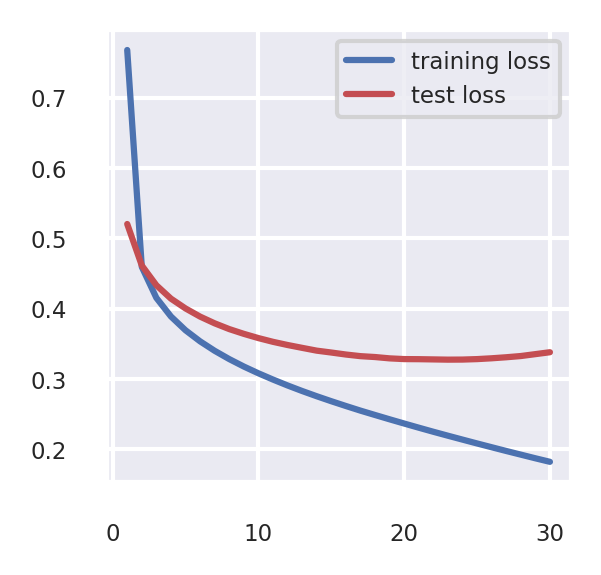

In [9]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(1,epochs+1),train_loss,'b',np.arange(1,epochs+1),test_loss,'r')
plt.legend(["training loss","test loss"])

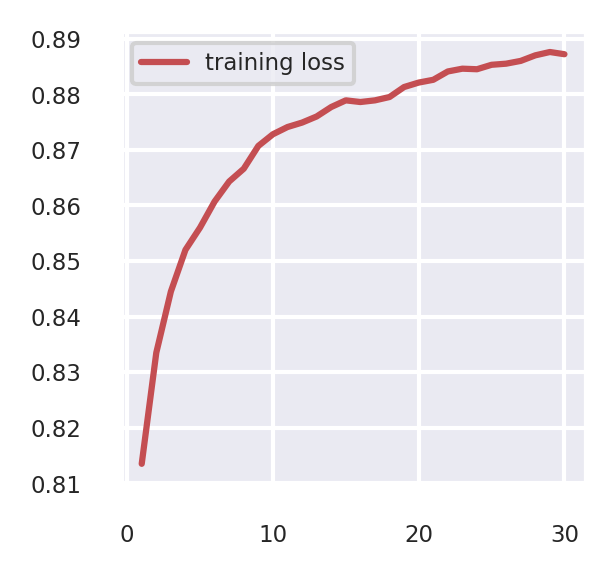

In [10]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(np.arange(1,epochs+1),test_acc,'r')
plt.legend(["training loss","test loss"])

Text(12.416666666666654, 0.5, 'True')

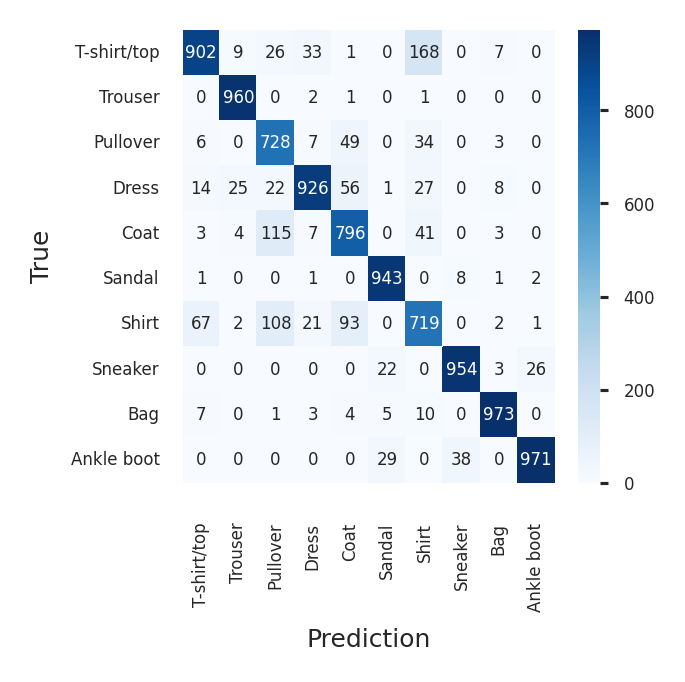

In [11]:
model2 = NeuralNetwork()
model2.load_state_dict(torch.load('drive/MyDrive/CP_data/hw01-1/test.pkl'))

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model2.eval()

cm=np.zeros((len(classes),len(classes)))

test_loader=DataLoader(test_data,batch_size=1)
for x,y in test_loader:
  pred = model2(x)
  cm[pred.argmax(1),y]+=1
  #print(f'預測值："{pred[0].argmax(0)}" / 實際值："{y[0]}"')

plt.rcParams.update({'ytick.major.size':2,'ytick.major.width':0.75})
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax=sn.heatmap(cm,xticklabels=classes,yticklabels=classes,annot=True,cmap='Blues',fmt='g',annot_kws={"fontsize":4})

plt.yticks(rotation=0) 
plt.xticks(rotation=90)
sn.set(font_scale=0.5)
ax.tick_params(labelsize=4) 
ax.figure.axes[-1].tick_params(labelsize=4)
plt.xlabel('Prediction')
plt.ylabel('True')